In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Section I: Summary of Data Treatment

In [2]:
# Read in the original dataset for the NSDUH 2021 survey 
# Purpose for importing is to get descriptive statistics on much data was preserved after cleaning
file_path = 'data/NSDUH_2021_Tab.txt'

data = pd.read_csv(file_path, sep='\t')

C:\Users\e.a.wright\AppData\Local\Temp\ipykernel_32056\2939283609.py:5: DtypeWarning: Columns (2792) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='\t')


In [3]:
# Save shape of data
N_rows = data.shape[0]
N_cols = data.shape[1]

# Print shape of data in sentence
print(f"There were {N_rows} rows and {N_cols} columns in the original dataset.")

There were 58034 rows and 2988 columns in the original dataset.


In [4]:
# Read in the pre-process subset of data to be used for modeling
subset = pd.read_csv('data/model_subset.csv')

In [5]:
# Inspect subset
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53896 entries, 0 to 53895
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATAG3      53896 non-null  int64  
 1   HEALTH2     53896 non-null  float64
 2   ANYHLTI2    53896 non-null  int64  
 3   INCOME      53896 non-null  int64  
 4   POVERTY3    53896 non-null  float64
 5   TOBFLAG     53896 non-null  int64  
 6   MRJFLAG     53896 non-null  int64  
 7   PYUD5MRJ    53896 non-null  float64
 8   MJYRTOT     53896 non-null  int64  
 9   ALCFLAG     53896 non-null  int64  
 10  COCFLAG     53896 non-null  int64  
 11  CRKFLAG     53896 non-null  int64  
 12  HERFLAG     53896 non-null  int64  
 13  LSDFLAG     53896 non-null  int64  
 14  METHAMFLAG  53896 non-null  int64  
 15  DEP         53896 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 6.6 MB


In [6]:
# Save shape of data
n_rows = subset.shape[0]
n_cols = subset.shape[1]

# Print shape of data in sentence
print(f"After cleaning and pre-processing, we were left with {n_rows} rows and {n_cols} columns in our experimental dataframe.")
# Print the percentage of individuals (rows) that were preserved
print(f"This means that {round((n_rows/N_rows)*100, 2)}% of the original dataset's rows (individuals) was preserved.")

After cleaning and pre-processing, we were left with 53896 rows and 16 columns in our experimental dataframe.
This means that 92.87% of the original dataset's rows (individuals) was preserved.


### Target: DEP - SCORE OF SYMPTOM INDICATORS 1 THRU 9 (For Depression)

### Note: DEP is a calculated variable combining the values of the Adult and Youth Depression Fields: "df['DEP'] = np.where((df['ADSMMDEA'] == 1) | (df['YODSMMDE'] == 1), 1, 0)" 

### 1 = Has 5 or more symptoms of depression
### 0 = Does not have 5 or more symptoms of depression

## Section II: Modeling

In [7]:
# Import Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Import SMOTE for oversampling of the minority class
from imblearn.over_sampling import SMOTE # synthetically generates new samples from the minority class

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import train_test_split and metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler # this randomly reuses samples from the minority class

In [8]:
# Check for class imbalance in the target variable
subset.DEP.value_counts()

0    42771
1    11125
Name: DEP, dtype: int64

In [9]:
# Instantiate a Gradient Boosting Classifier
gbt = GradientBoostingClassifier(random_state=42)

# Define X and y
X = subset.drop('DEP', axis=1)
y = subset['DEP']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled) # Here the resampled X_train data is scaled
X_test_scaled = scaler.transform(X_test) # Here the original X_test data is scaled as it was not resampled

# Note: you do not need to scale the target variable (y).  

In [10]:
y_train.value_counts()

0    32087
1     8335
Name: DEP, dtype: int64

In [13]:
# Convert X_train_resampled_scaled to dataframe for inspection
X_train_resampled_scaled_df = pd.DataFrame(X_train_resampled_scaled, columns=X_train.columns)

# Inspect X_train_resampled_scaled_df
X_train_resampled_scaled_df.head()

,CATAG3,HEALTH2,ANYHLTI2,INCOME,POVERTY3,TOBFLAG,MRJFLAG,PYUD5MRJ,MJYRTOT,ALCFLAG,COCFLAG,CRKFLAG,HERFLAG,LSDFLAG,METHAMFLAG
0,-0.611073,-0.407494,-0.273951,1.071703,0.707423,-0.989459,-0.969245,-0.322622,-0.373269,-1.680605,-0.363807,-0.160774,-0.130895,-0.323715,-0.210746
1,0.836589,-0.407494,-0.273951,-0.655087,-1.893003,-0.989459,-0.969245,-0.322622,-0.373269,-1.680605,-0.363807,-0.160774,-0.130895,-0.323715,-0.210746
2,-0.611073,0.673268,-0.273951,0.208308,-0.592790,1.010653,1.031731,-0.322622,0.143338,0.595024,-0.363807,-0.160774,-0.130895,-0.323715,-0.210746
3,0.112758,-0.407494,-0.273951,1.071703,0.707423,1.010653,1.031731,-0.322622,-0.351743,0.595024,2.748707,-0.160774,-0.130895,-0.323715,-0.210746
4,1.560419,1.754029,-0.273951,-1.518482,-1.893003,1.010653,1.031731,-0.322622,-0.373269,0.595024,-0.363807,-0.160774,-0.130895,-0.323715,-0.210746


In [14]:
# Inspect y_train_resampled for evidence of successful resampling
y_train_resampled.value_counts()

1    32087
0    32087
Name: DEP, dtype: int64

In [15]:
# Fit the model to the oversampled training data
gbt.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred = gbt.predict(X_test_scaled)

In [16]:
# Return a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78     10684
           1       0.34      0.55      0.42      2790

    accuracy                           0.68     13474
   macro avg       0.60      0.64      0.60     13474
weighted avg       0.75      0.68      0.71     13474



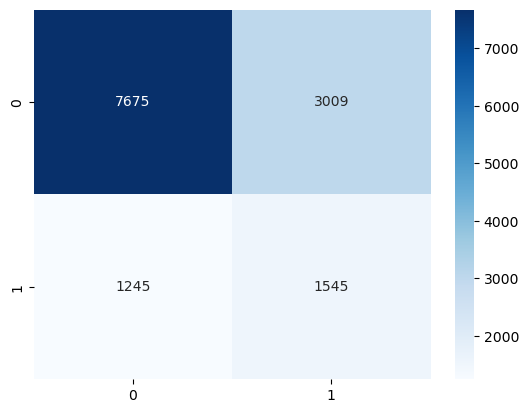

In [22]:
# Print a pretty confusion matrix
ax1 = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show(ax1)

In [26]:
# Create feature importance dataframe to analyze the importance of each feature
fi_values = gbt.feature_importances_
features = X_train.columns
# Create dataframe
feature_importance_df = pd.DataFrame({"feature": features, "feature_importance": fi_values})
# Sort in descending order
feature_importance_df = feature_importance_df.sort_values(by="feature_importance", ascending = False)
# View dataframe
feature_importance_df

,feature,feature_importance
1,HEALTH2,0.362204
0,CATAG3,0.266727
6,MRJFLAG,0.115889
7,PYUD5MRJ,0.080821
4,POVERTY3,0.056055
2,ANYHLTI2,0.040701
9,ALCFLAG,0.029343
8,MJYRTOT,0.027589
3,INCOME,0.011978
5,TOBFLAG,0.005321


In [ ]:
# Note: Next step will be to eliminate features with low feature importance values to, theoretically, prevent overfitting

## Section III: Confirming Validity of DEP against age-specific depression targets

### Before proceeding, use CATAG3 to create an ADULT dataframe and a YOUTH dataframe each with their appropriate target column

In [23]:
# Read in subset_three_targets.csv
df = pd.read_csv('data/subset_three_targets.csv')

In [24]:
# Create ADULT dataframe (CATAG3 == 2, 3, or 4)
ADULT = df[df['CATAG3'].isin([2,3,4])]

# Drop the YODSMMDE and DEP columns from ADULT dataframe
ADULT = ADULT.drop(['YODSMMDE', 'DEP'], axis=1)

# Create YOUTH dataframe (CATAG3 == 1)
YOUTH = df[df['CATAG3'].isin([1])]

# Drop the ADSMMDEA and DEP columns from YOUTH dataframe
YOUTH = YOUTH.drop(['ADSMMDEA', 'DEP'], axis=1)

In [25]:
# Inspect the value counts of the target variables for ADULT
adultVC = ADULT.ADSMMDEA.value_counts()

adultVC

0    25813
1     7364
Name: ADSMMDEA, dtype: int64

In [27]:
# Percent Adult's with Depression
percent_adults_depression = round(adultVC[1]/(adultVC[0]+adultVC[1]), 2)*100 # Round to 2 decimal places

# Print
print(f"Percent of Adults with Depression: {percent_adults_depression}%")

Percent of Adults with Depression: 22.0%


In [28]:
# Inspect the value counts of the target variables for YOUTH
youthVC = YOUTH.YODSMMDE.value_counts()

youthVC

0    7684
1    2557
Name: YODSMMDE, dtype: int64

In [29]:
# Percent YOUTH with Depression
percent_youth_depression = round(youthVC[1]/(youthVC[0]+youthVC[1]), 2)*100 # Round to 2 decimal places

# Print
print(f"Percent of Adults with Depression: {percent_youth_depression}%")

Percent of Adults with Depression: 25.0%


### Train and test a model on ADULT dataset

In [30]:
# Instantiate a Gradient Boosting Classifier
gbt = GradientBoostingClassifier(random_state=42)

# Define X and y
X = ADULT.drop('ADSMMDEA', axis=1)
y = ADULT['ADSMMDEA']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled) # Here the resampled X_train data is scaled
X_test_scaled = scaler.transform(X_test) # Here the original X_test data is scaled as it was not resampled

# Note: you do not need to scale the target variable (y).  

In [31]:
# Fit the model to the oversampled training data
gbt.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred = gbt.predict(X_test_scaled)

In [32]:
# Return a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.70      0.77      6423
           1       0.35      0.53      0.42      1872

    accuracy                           0.67      8295
   macro avg       0.59      0.62      0.59      8295
weighted avg       0.73      0.67      0.69      8295



In [33]:
# Create feature importance dataframe to analyze the importance of each feature
fi_values = gbt.feature_importances_
features = X_train.columns
# Create dataframe
adult_feature_importance_df = pd.DataFrame({"feature": features, "adult_feature_importance": fi_values})
# Sort in descending order
adult_feature_importance_df = adult_feature_importance_df.sort_values(by="adult_feature_importance", ascending = False)
# View dataframe
adult_feature_importance_df

,feature,adult_feature_importance
1,HEALTH2,0.440975
6,MRJFLAG,0.145312
7,PYUD5MRJ,0.090688
0,CATAG3,0.083567
4,POVERTY3,0.072345
2,ANYHLTI2,0.064079
8,MJYRTOT,0.040727
3,INCOME,0.025015
9,ALCFLAG,0.021143
5,TOBFLAG,0.009005


### Train and test a model with YOUTH dataset

In [34]:
# Instantiate a Gradient Boosting Classifier
gbt = GradientBoostingClassifier(random_state=42)

# Define X and y
X = YOUTH.drop('YODSMMDE', axis=1)
y = YOUTH['YODSMMDE']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled) # Here the resampled X_train data is scaled
X_test_scaled = scaler.transform(X_test) # Here the original X_test data is scaled as it was not resampled

# Note: you do not need to scale the target variable (y).

# Fit the model to the oversampled training data
gbt.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred = gbt.predict(X_test_scaled)

# Return a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1937
           1       0.37      0.56      0.45       624

    accuracy                           0.67      2561
   macro avg       0.60      0.63      0.60      2561
weighted avg       0.72      0.67      0.68      2561



In [35]:
# Create feature importance dataframe to analyze the importance of each feature
fi_values = gbt.feature_importances_
features = X_train.columns
# Create dataframe
youth_feature_importance_df = pd.DataFrame({"feature": features, "youth_feature_importance": fi_values})
# Sort in descending order
youth_feature_importance_df = youth_feature_importance_df.sort_values(by="youth_feature_importance", ascending = False)
# View dataframe
youth_feature_importance_df

,feature,youth_feature_importance
1,HEALTH2,0.499813
9,ALCFLAG,0.244815
6,MRJFLAG,0.070116
4,POVERTY3,0.041385
8,MJYRTOT,0.039888
7,PYUD5MRJ,0.034001
3,INCOME,0.026361
2,ANYHLTI2,0.017742
5,TOBFLAG,0.016949
10,COCFLAG,0.004962


In [37]:
# Merge the two feature importance dataframes (adult_feature_importance_df and youth_feature_importance_df) on ['feature']

FEATURE_IMPORTANCES = pd.merge(feature_importance_df, adult_feature_importance_df, on=['feature'], how='outer')

# Merge FEATURE_IMPORTANCES with youth_feature_importance_df on ['feature']
FEATURE_IMPORTANCES = pd.merge(FEATURE_IMPORTANCES, youth_feature_importance_df, on=['feature'], how='outer')

# Inspect

FEATURE_IMPORTANCES

,feature,feature_importance,adult_feature_importance,youth_feature_importance
0,HEALTH2,0.362204,0.440975,0.499813
1,CATAG3,0.266727,0.083567,0.000000
2,MRJFLAG,0.115889,0.145312,0.070116
3,PYUD5MRJ,0.080821,0.090688,0.034001
4,POVERTY3,0.056055,0.072345,0.041385
5,ANYHLTI2,0.040701,0.064079,0.017742
6,ALCFLAG,0.029343,0.021143,0.244815
7,MJYRTOT,0.027589,0.040727,0.039888
8,INCOME,0.011978,0.025015,0.026361
9,TOBFLAG,0.005321,0.009005,0.016949


C:\Users\e.a.wright\AppData\Local\Temp\ipykernel_32056\1034042247.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  melted_data = pd.melt(FEATURE_IMPORTANCES, id_vars='feature', var_name='iteration', value_name='feature_importance')


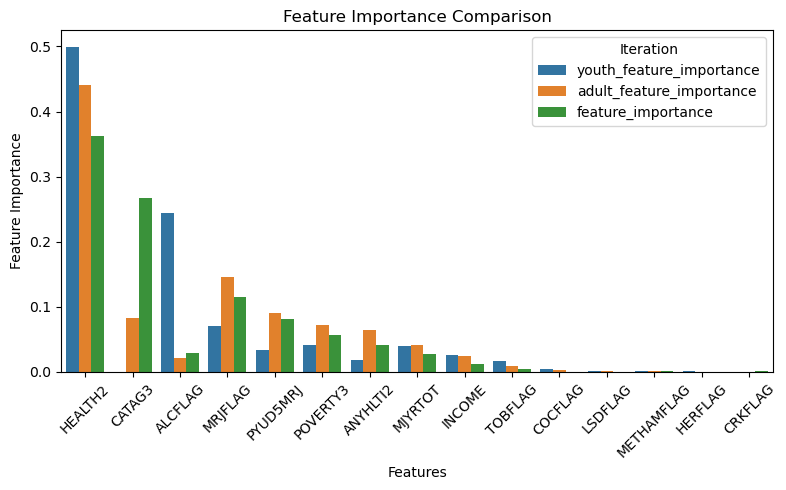

In [39]:
# Melting the data to create a single importance column for both iterations
melted_data = pd.melt(FEATURE_IMPORTANCES, id_vars='feature', var_name='iteration', value_name='feature_importance')

# Sorting data by feature importance for better visualization
melted_data = melted_data.sort_values(by='feature_importance', ascending=False)

# Create a bar plot using Seaborn with bars side by side
plt.figure(figsize=(8, 5))
sns.barplot(x='feature', y='feature_importance', hue='iteration', data=melted_data)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Comparison')
plt.xticks(rotation=45)
plt.legend(title='Iteration')
plt.tight_layout()
plt.show()

# Wish list: add the combined model's feature importance values

In [57]:
# Pull the top 9 most important features from each model and create new dataframes with them

['HEALTH2',
 'MRJFLAG',
 'PYUD5MRJ',
 'CATAG3',
 'POVERTY3',
 'ANYHLTI2',
 'MJYRTOT',
 'INCOME',
 'ALCFLAG']

In [ ]:

# Select first 9 features from adult_feature_importance_df
Top9_adult = adult_feature_importance_df['feature'][:9]

# Convert into list
Top9_adult = Top9_adult.tolist()

# Inspect
Top9_adult

In [61]:
# Retrain and test model using Top9_adult as X

# Instantiate a Gradient Boosting Classifier
gbt = GradientBoostingClassifier(random_state=42)

# Define X and y
X = ADULT[['HEALTH2',
            'MRJFLAG',
            'PYUD5MRJ',
            'CATAG3',
            'POVERTY3',
            'ANYHLTI2',
            'MJYRTOT',
            'INCOME',
            'ALCFLAG']]
y = ADULT['ADSMMDEA']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled) # Here the resampled X_train data is scaled
X_test_scaled = scaler.transform(X_test) # Here the original X_test data is scaled as it was not resampled

# Note: you do not need to scale the target variable (y).  

# Fit the model to the oversampled training data
gbt.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred = gbt.predict(X_test_scaled)

# Return a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76      6423
           1       0.34      0.54      0.42      1872

    accuracy                           0.66      8295
   macro avg       0.59      0.62      0.59      8295
weighted avg       0.73      0.66      0.68      8295



In [ ]:
### Taking a break here after making some tangible progress but no model performance improvement.

In [6]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Ensembled sampling
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedBaggingClassifier

In [13]:
subset = subset.dropna()

In [14]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53896 entries, 0 to 53911
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATAG3      53896 non-null  int64  
 1   HEALTH2     53896 non-null  float64
 2   ANYHLTI2    53896 non-null  int64  
 3   INCOME      53896 non-null  int64  
 4   POVERTY3    53896 non-null  float64
 5   TOBFLAG     53896 non-null  int64  
 6   MRJFLAG     53896 non-null  int64  
 7   PYUD5MRJ    53896 non-null  float64
 8   MJYRTOT     53896 non-null  int64  
 9   ALCFLAG     53896 non-null  int64  
 10  COCFLAG     53896 non-null  int64  
 11  CRKFLAG     53896 non-null  int64  
 12  HERFLAG     53896 non-null  int64  
 13  LSDFLAG     53896 non-null  int64  
 14  METHAMFLAG  53896 non-null  int64  
 15  ADDPREV     53896 non-null  int64  
 16  ADSMMDEA    53896 non-null  int64  
 17  YODSMMDE    53896 non-null  int64  
 18  DEP         53896 non-null  int64  
dtypes: float64(3), int64(16)


In [15]:
# Define X and y
X = subset.drop('DEP', axis=1)
y = subset['DEP']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
# Train the balanced random forest model
brf = BalancedRandomForestClassifier(random_state=42)
brf_model_cv = cross_validate(brf, X_train, y_train, cv = 5, n_jobs = -1, scoring="precision")

# Check the model performance
print(f"{brf_model_cv['test_score'].mean():.3f} +/- {brf_model_cv['test_score'].std():.3f}")

1.000 +/- 0.000


In [ ]:
# Next Model

In [19]:
# Train the balanced bagging classifier model using near miss under sampling
bbc_nm = BalancedBaggingClassifier(random_state=42, sampler=(NearMiss(version=3)))
bbc_nm_model_cv = cross_validate(bbc_nm, X_train, y_train, cv = 5, n_jobs = -1, scoring="recall")

# Check the model performance
print(f"{bbc_nm_model_cv['test_score'].mean():.3f} +/- {bbc_nm_model_cv['test_score'].std():.3f}")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\ensemble\_bagging.py", line 422, in fit
    return super().fit(X, y)
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\ensemble\_bagging.py", line 337, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\ensemble\_bagging.py", line 437, in _fit
    return super()._fit(X, y, self.max_samples, sample_weight=None)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\ensemble\_bagging.py", line 472, in _fit
    all_results = Parallel(
                  ^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\joblib\_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
             ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\joblib\_parallel_backends.py", line 597, in __init__
    self.results = batch()
                   ^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\joblib\parallel.py", line 288, in __call__
    return [func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\joblib\parallel.py", line 288, in <listcomp>
    return [func(*args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\utils\parallel.py", line 123, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\ensemble\_bagging.py", line 144, in _parallel_build_estimators
    estimator_fit(X_, y[indices])
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
                               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\pipeline.py", line 422, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\base.py", line 208, in fit_resample
    return super().fit_resample(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\base.py", line 112, in fit_resample
    output = self._fit_resample(X, y)
             ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py", line 269, in _fit_resample
    dist_vec, idx_vec = self.nn_ver3_.kneighbors(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\neighbors\_base.py", line 824, in kneighbors
    results = ArgKmin.compute(
              ^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py", line 277, in compute
    return ArgKmin64.compute(
           ^^^^^^^^^^^^^^^^^^
  File "sklearn\metrics\_pairwise_distances_reduction\_argkmin.pyx", line 95, in sklearn.metrics._pairwise_distances_reduction._argkmin.ArgKmin64.compute
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\utils\fixes.py", line 139, in threadpool_limits
    return threadpoolctl.threadpool_limits(limits=limits, user_api=user_api)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\threadpoolctl.py", line 171, in __init__
    self._original_info = self._set_threadpool_limits()
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\threadpoolctl.py", line 268, in _set_threadpool_limits
    modules = _ThreadpoolInfo(prefixes=self._prefixes,
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\threadpoolctl.py", line 340, in __init__
    self._load_modules()
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\threadpoolctl.py", line 373, in _load_modules
    self._find_modules_with_enum_process_module_ex()
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\threadpoolctl.py", line 485, in _find_modules_with_enum_process_module_ex
    self._make_module_from_path(filepath)
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'


In [ ]:
# Train the balanced random forest model
brf = BalancedRandomForestClassifier(random_state=42)
brf_model = brf.fit(X_train, y_train)
brf_prediction = brf_model.predict(X_test)

# Check the model performance
print(classification_report(y_test, brf_prediction))

# Sweet Sweet Victory!

In [98]:
# Write subset to a csv file
df.to_csv('data/model_subset.csv', index=False)